# Prédiction de l'âge d'un opossum à l'aide de la régression

*David Scanu*

## Contexte du projet

Un groupe de zoologistes vous fournit une dataset regroupant les caractéristiques d'opossums qu'ils ont étudiés et vous demande un programme capable de prédire l'âge d'un opossum à partir de ses caractéristiques.

---
## Sommaire : 
- Objectif
- Description des caractères
- Importer les bibliothèques
- Importer les données
- Valeurs manquantes
- Suppression des colonnes inutiles
- Analyse statistique de base
- Visualisation
- Encodage
- Correlations
- Outliers
- Equilibre
- Séparation des données
- Train test split
- Feature selection
- Mise à l'échelle
- KNeighborsRegressor
- Régression linéaire
- Régression polynomiale
- Choix du modèle
- Export du modèle

---

## Notre objectif

Prédire l'age d'un opossum à partir de ses caractéristiques.

## Description des caractères


The dataset contains **104 observations** and **14 columns**: 

- case: observation number
- site: The site number where the possum was trapped.
- Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland)
- sex: Gender, either m (male) or f (female)
- **age: Age**
- hdlngth: Head length, in mm
- skullw: Skull width, in mm
- totlngth: Total length, in cm
- taill: Tail length, in cm
- footlgth: foot length
- earconch: ear conch length
- eye: distance from medial canthus to lateral canthus of right eye
- chest: chest girth, in cm
- belly: belly girth, in cm
  
**Original Source of dataset:**

*Lindenmayer, D. B., Viggers, K. L., Cunningham, R. B., and Donnelly, C. F. 1995. Morphological variation among columns of the mountain brushtail possum, Trichosurus caninus Ogilby (Phalangeridae: Marsupiala). Australian Journal of Zoology 43: 449-458.*


## Importer les bibliothèques

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importer les données

In [296]:
# Importe les données
df = pd.read_csv('data/opossum.csv') # Dataframe 

In [297]:
# Montre les premières lignes du jeu de données
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Valeurs manquantes

In [298]:
# Existe-t-il des valeurs manquantes ?
print(df.isnull().values.any())

True


In [299]:
print(df.isnull().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


*Stratégie 1* : Suppression des lignes contenant des valeurs manquantes.

In [300]:
df = df.dropna()

In [301]:
print(df.isnull().sum())

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


*Stratégie 2* : Remplacer les valeurs manquantes par : 
- Moyenne
- Médiane
- Mode
- Valeur arbitraire
- ...

*Selon la stratégie*

In [302]:
# SimpleImputer
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# imputer = imputer.fit(data)

# imputer.transform retourne un ndarray, donc besoin de recréer un DataFrame
# data_no_nan_mode = pd.DataFrame(imputer.transform(df_nan.loc[:,:]), columns = data.columns)
# data_no_nan_mode.head()

## Suppression colonnes inutiles

In [303]:
df = df.drop(columns=['case'])

## Analyse statistique de base

In [304]:
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


### Moyennes et médianes

In [305]:
df.groupby('sex').agg(['mean', 'median'])

/tmp/ipykernel_1280/2527321126.py:1: FutureWarning: ['Pop'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('sex').agg(['mean', 'median'])


site              age           hdlngth            skullw         \
         mean median      mean median       mean median       mean median   
sex                                                                         
f    3.000000    2.0  3.952381    3.5  92.238095   92.5  56.578571  56.35   
m    4.152542    5.0  3.728814    3.0  93.081356   93.3  57.232203  56.60   

      totlngth         ...   footlgth          earconch               eye  \
          mean median  ...       mean median       mean median       mean   
sex                    ...                                                  
f    88.023810  88.75  ...  69.111905  70.45  48.773810   50.8  14.785714   
m    86.732203  86.00  ...  67.889831  66.50  47.677966   46.2  15.238983   

                chest             belly         
    median       mean median       mean median  
sex                                             
f    14.75  27.345238   28.0  32.940476   33.0  
m    15.00  26.864407   27.0  32.423729   32.0  

[2 rows x 22 columns]

### Ecart-type

In [306]:
df.groupby('sex').std()

/tmp/ipykernel_1280/821693072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').std()


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
sex,,,,,,,,,,,
f,2.241515,1.962482,2.537903,2.599112,4.161309,1.850542,4.911321,4.123819,1.028276,1.862624,2.940886
m,2.354845,1.892185,4.061190,3.411969,4.173828,2.067816,3.987683,3.986921,1.047825,2.118943,2.569405


## Visualisation

### Distribution

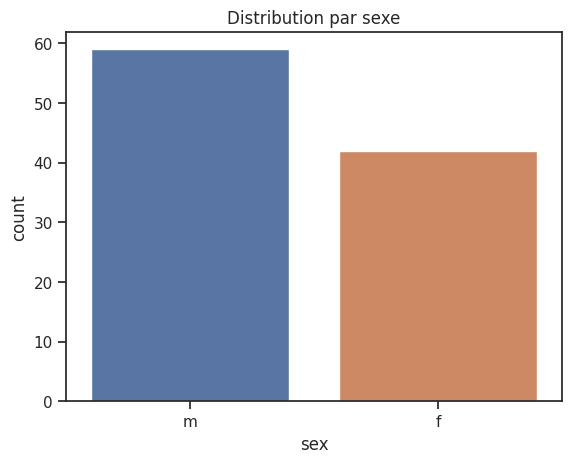

In [307]:
# Distribution par sexe
sns.countplot(data=df, x='sex')
plt.title('Distribution par sexe')
plt.show()

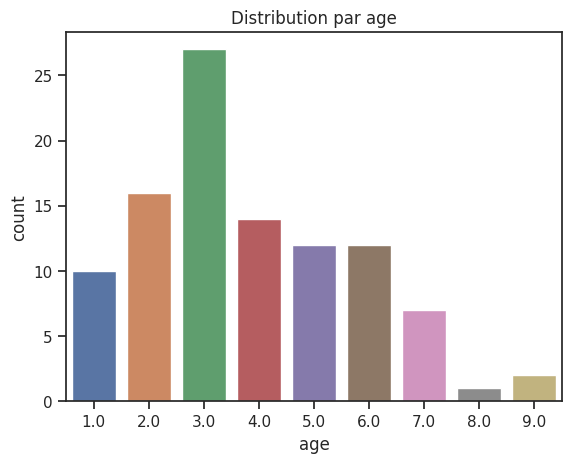

In [308]:
# Distribution par age
sns.countplot(data=df, x='age')
plt.title('Distribution par age')
plt.show()

## Encodage

In [309]:
from sklearn.preprocessing import LabelEncoder

labelencoder_sex = LabelEncoder()
df['sex_enc'] = labelencoder_sex.fit_transform(df['sex'])

labelencoder_pop = LabelEncoder()
df['Pop_enc'] = labelencoder_pop.fit_transform(df['Pop'])

print(labelencoder_sex.classes_)
print(labelencoder_pop.classes_)

['f' 'm']
['Vic' 'other']


In [310]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_enc,Pop_enc
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0


## Correlations

### Pairplot

Premier reflexe, tracer un pairplot pour mettre en évidence répartitions et corrélations.

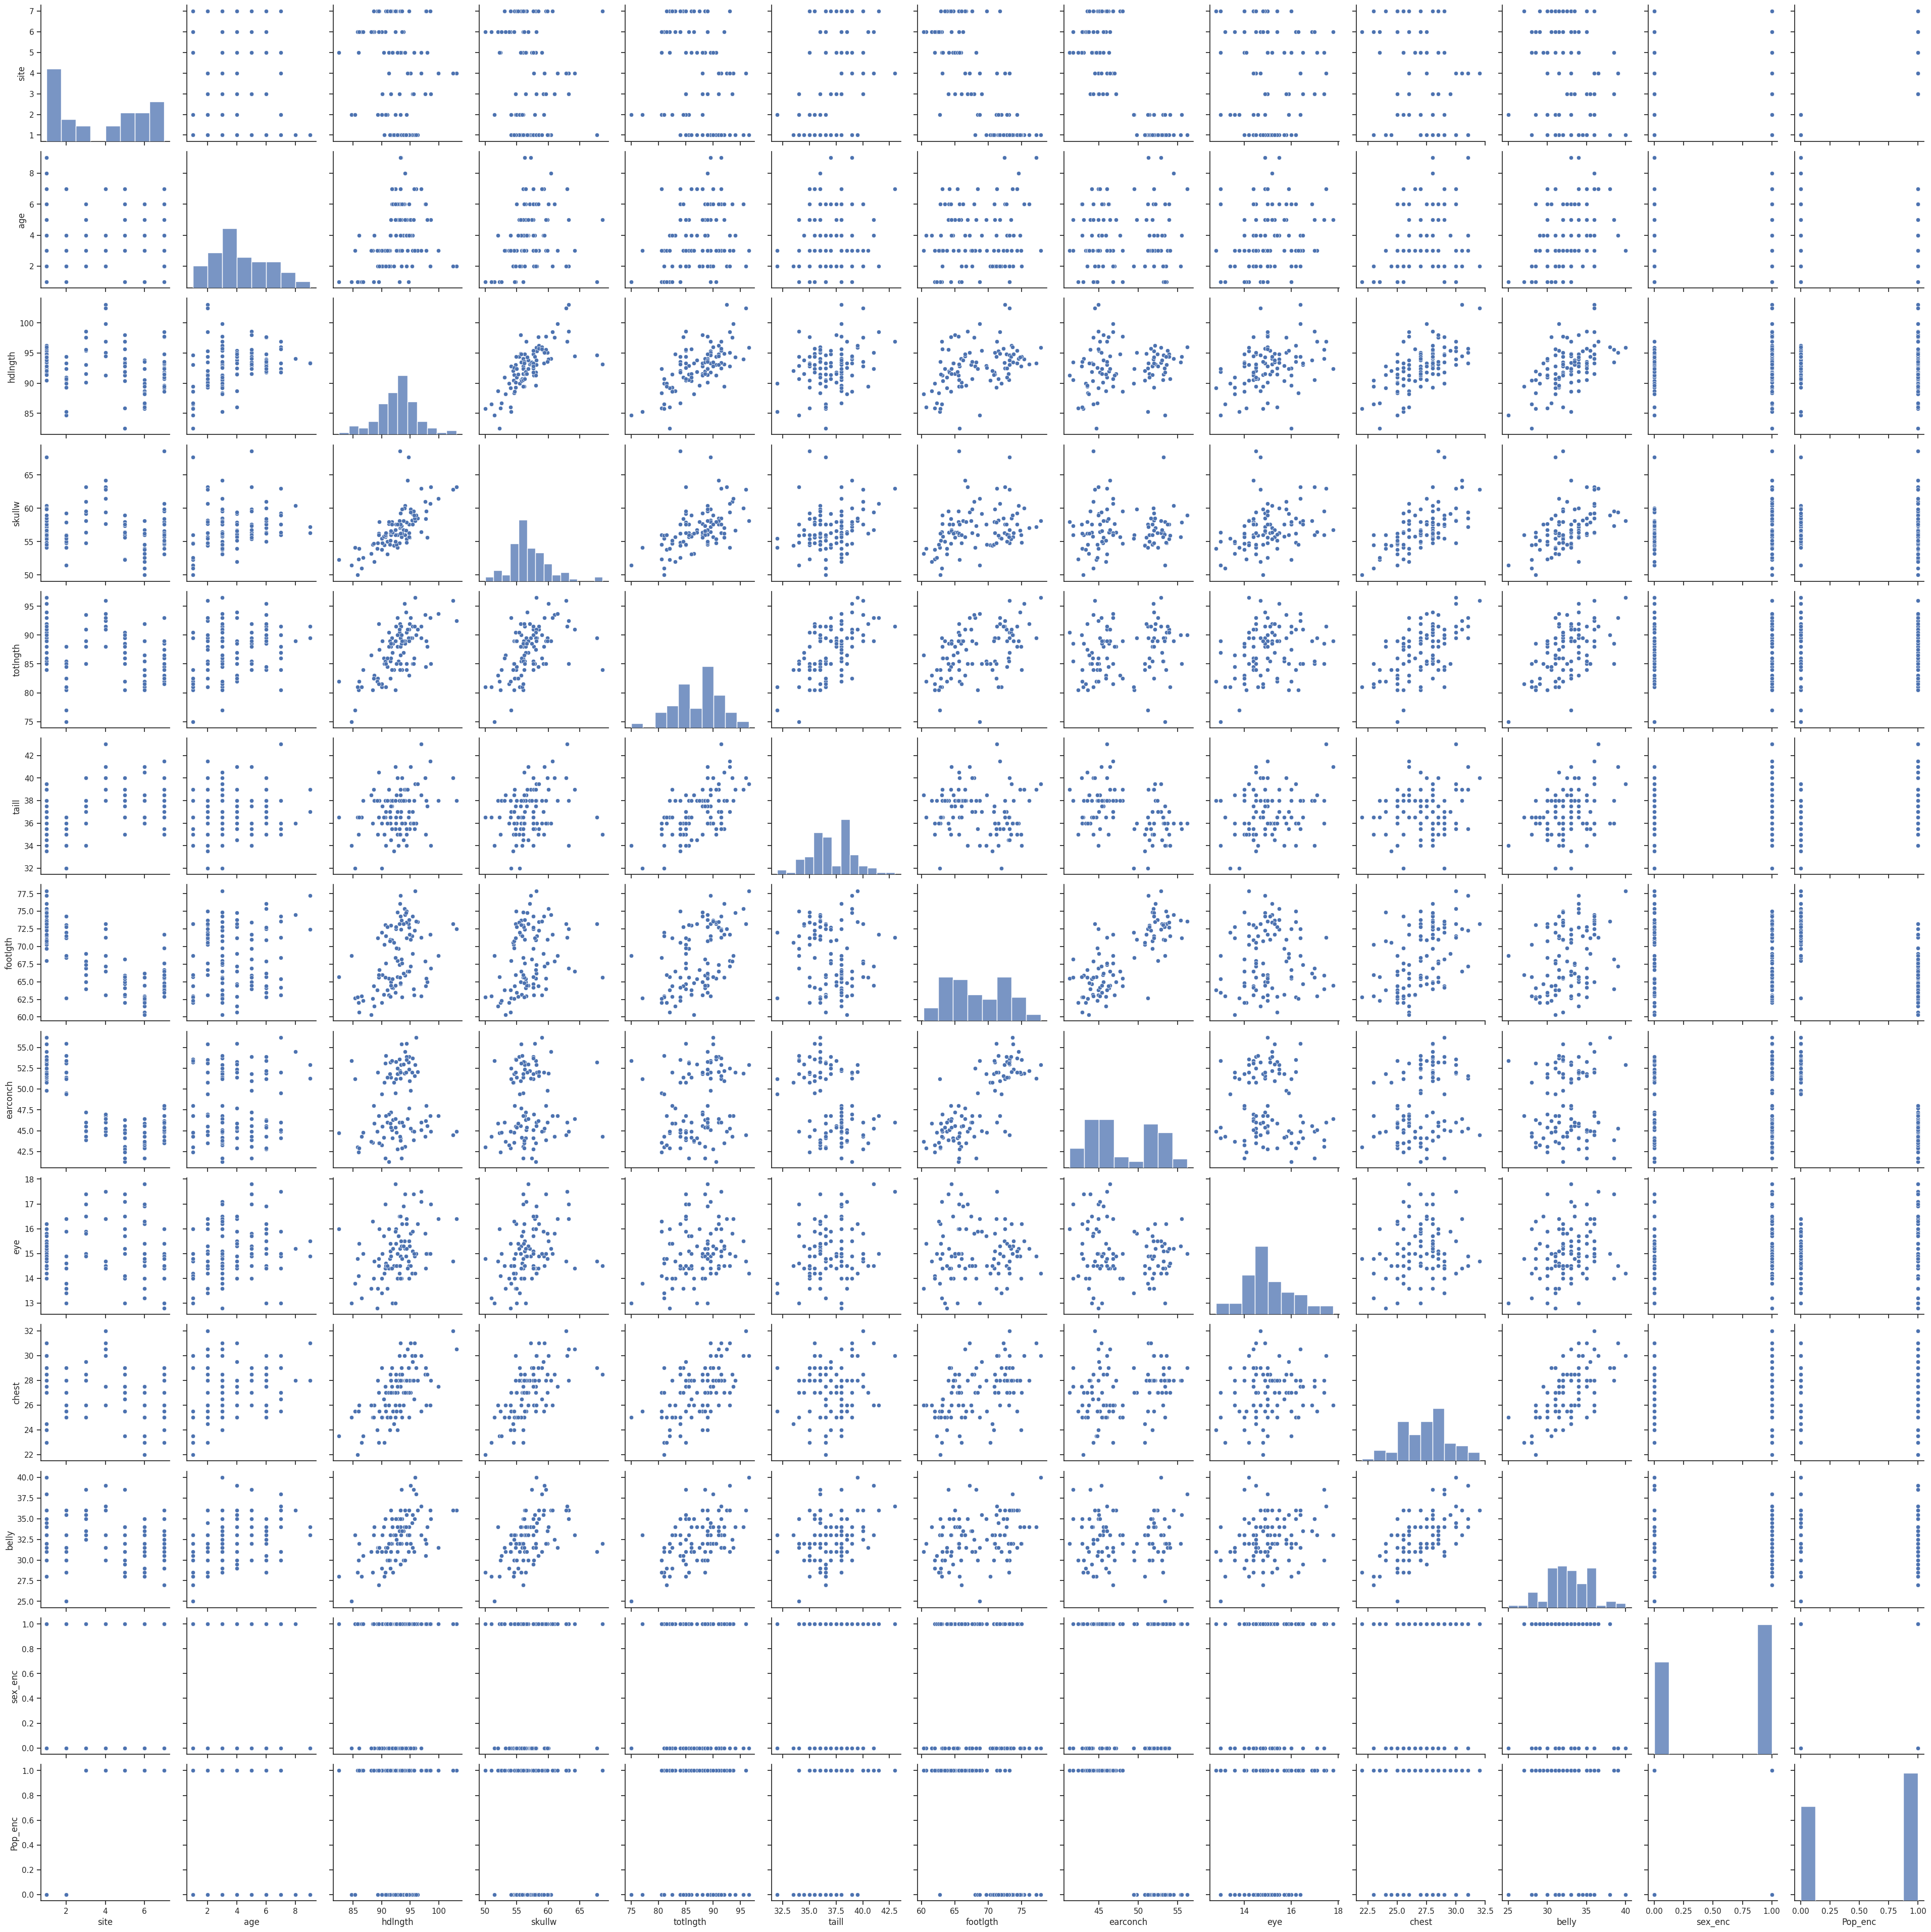

In [311]:
sns.pairplot(data=df, height=3)

### Heatmap

/tmp/ipykernel_1280/4097231097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True, cmap='RdBu', fmt=".2f")


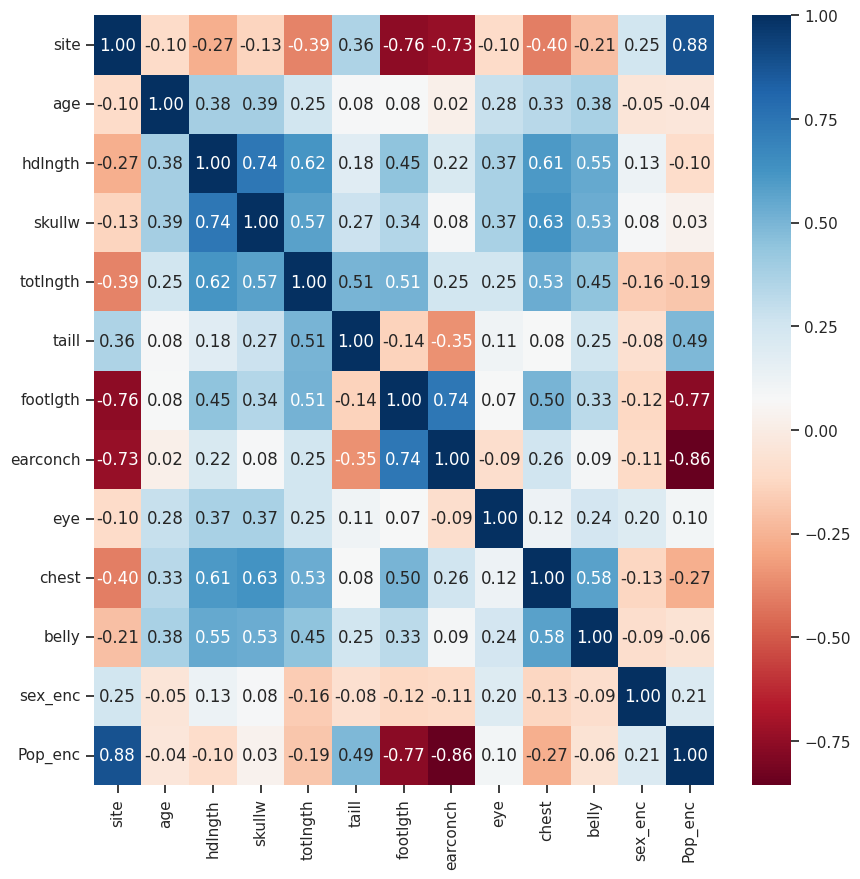

In [312]:
# Visualise les correlations
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='RdBu', fmt=".2f")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

## Outliers

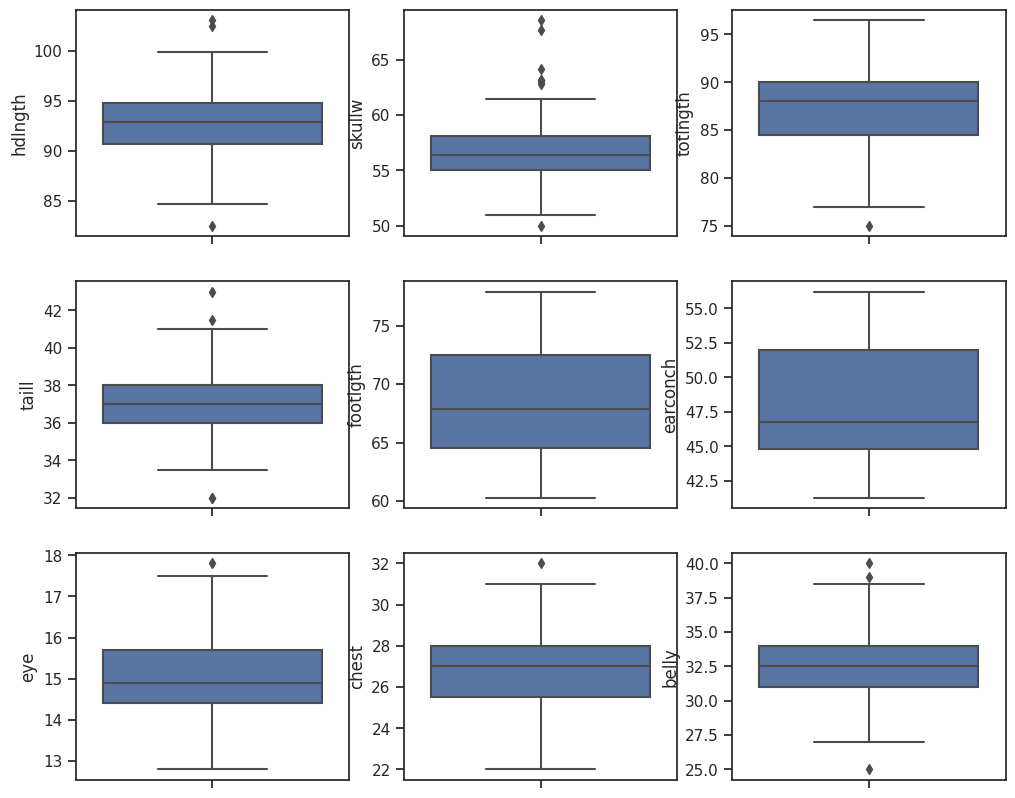

In [313]:
# Visualiser les outliers avec boxplot()
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
sns.boxplot(data=df, y=df['hdlngth'])
plt.subplot(3,3,2)
sns.boxplot(data=df, y=df['skullw'])
plt.subplot(3,3,3)
sns.boxplot(data=df, y=df['totlngth'])
plt.subplot(3,3,4)
sns.boxplot(data=df, y=df['taill'])
plt.subplot(3,3,5)
sns.boxplot(data=df, y=df['footlgth'])
plt.subplot(3,3,6)
sns.boxplot(data=df, y=df['earconch'])
plt.subplot(3,3,7)
sns.boxplot(data=df, y=df['eye'])
plt.subplot(3,3,8)
sns.boxplot(data=df, y=df['chest'])
plt.subplot(3,3,9)
sns.boxplot(data=df, y=df['belly'])
plt.show()

In [314]:
def remove_outliers(df, col):
    """Function that removes outliers under Q1 and above Q3."""
    #On utilise l'IQR
    Q1 = np.percentile(df[col], 25,method = 'midpoint')
    Q3 = np.percentile(df[col], 75,method = 'midpoint')
    IQR = Q3 - Q1

    max_v=Q3+1.5*IQR
    min_v=Q1-1.5*IQR

    # Upper bound
    ind_upper = np.where(df[col] >= max_v)
    # Lower bound
    ind_lower = np.where(df[col] > min_v)

    # number of rows before removal
    nb_of_rows_before = df.shape[0]

    # Suppresion des Outliers
    df.drop(df[df[col] > max_v].index, inplace = True)
    df.drop(df[df[col] < min_v].index, inplace = True)
    
    print(f"'{col}' => Q1 : {Q1} - Q3 : {Q3} - Min : {min_v} - Max : {max_v}")
    
    # number of rows after removal
    nb_of_rows_after = df.shape[0]
    nb_of_rows_removed = nb_of_rows_before - nb_of_rows_after

    # number of rows removed from dataset 
    print(f"{nb_of_rows_removed} outliers were removed in '{col}'")


In [315]:
remove_outliers(df, 'hdlngth')
remove_outliers(df, 'skullw')
remove_outliers(df, 'totlngth')
remove_outliers(df, 'taill')
remove_outliers(df, 'footlgth')
remove_outliers(df, 'earconch')
remove_outliers(df, 'eye')
remove_outliers(df, 'chest')
remove_outliers(df, 'belly')

'hdlngth' => Q1 : 90.7 - Q3 : 94.8 - Min : 84.55000000000001 - Max : 100.94999999999999
3 outliers were removed in 'hdlngth'
'skullw' => Q1 : 55.1 - Q3 : 58.1 - Min : 50.6 - Max : 62.6
6 outliers were removed in 'skullw'
'totlngth' => Q1 : 84.5 - Q3 : 90.0 - Min : 76.25 - Max : 98.25
1 outliers were removed in 'totlngth'
'taill' => Q1 : 36.0 - Q3 : 38.0 - Min : 33.0 - Max : 41.0
3 outliers were removed in 'taill'
'footlgth' => Q1 : 64.45 - Q3 : 72.6 - Min : 52.225000000000016 - Max : 84.82499999999999
0 outliers were removed in 'footlgth'
'earconch' => Q1 : 44.849999999999994 - Q3 : 52.0 - Min : 34.124999999999986 - Max : 62.72500000000001
0 outliers were removed in 'earconch'
'eye' => Q1 : 14.4 - Q3 : 15.7 - Min : 12.450000000000003 - Max : 17.65
1 outliers were removed in 'eye'
'chest' => Q1 : 25.5 - Q3 : 28.0 - Min : 21.75 - Max : 31.75
0 outliers were removed in 'chest'
'belly' => Q1 : 31.0 - Q3 : 34.0 - Min : 26.5 - Max : 38.5
2 outliers were removed in 'belly'


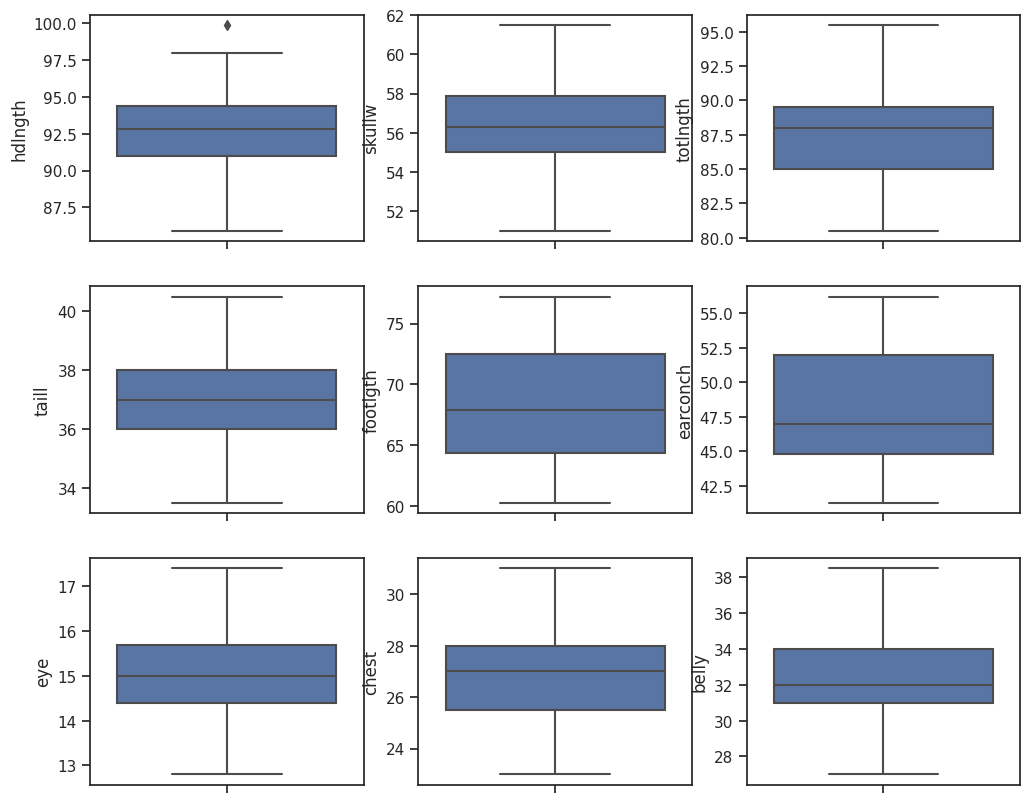

In [316]:
# Visualiser les outliers avec boxplot()
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
sns.boxplot(data=df, y=df['hdlngth'])
plt.subplot(3,3,2)
sns.boxplot(data=df, y=df['skullw'])
plt.subplot(3,3,3)
sns.boxplot(data=df, y=df['totlngth'])
plt.subplot(3,3,4)
sns.boxplot(data=df, y=df['taill'])
plt.subplot(3,3,5)
sns.boxplot(data=df, y=df['footlgth'])
plt.subplot(3,3,6)
sns.boxplot(data=df, y=df['earconch'])
plt.subplot(3,3,7)
sns.boxplot(data=df, y=df['eye'])
plt.subplot(3,3,8)
sns.boxplot(data=df, y=df['chest'])
plt.subplot(3,3,9)
sns.boxplot(data=df, y=df['belly'])
plt.show()

## Equilibre

In [317]:
# Vérifier que les cibles du jeu de données sont **bien équilibrées**.
df['age'].value_counts()

3.0    24
4.0    13
6.0    12
2.0    12
5.0     9
1.0     6
7.0     6
9.0     2
8.0     1
Name: age, dtype: int64

## Séparation des données

Séparer le jeu de données :
- X : les variables
- y : la cible

In [318]:
# Fonctionne avec DataFrame ou ndarray

# Variables
# Enleve la colonne 'target' du DataFrame
# Enleve les colonnes non-encodées
X = df.drop(['age', 'sex', 'Pop'], axis=1)

# Cible
# Garder uniquement la colonne cible
y = df['age']



In [319]:
X.head()

,site,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_enc,Pop_enc
0,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0
1,1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,1,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,1,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,1,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0


In [320]:
y.head()

0    8.0
1    6.0
2    6.0
3    6.0
4    2.0
Name: age, dtype: float64

## Train Test Split

In [321]:
from sklearn.model_selection import train_test_split

# Split les données, retourne DataFrame ou ndarray
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [322]:
# Colonnes
X_col_names = list(X_train.columns)
X_col_names

['site',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly',
 'sex_enc',
 'Pop_enc']

## Feature Selection

### Sélection basée sur l'AED

In [323]:
# Selection des colonnes basée sur l'analyse epxloratoire des données
# Analyse des correlations avec la cible
# Analyse des correlations entre elles

X_col_names_eda = ['hdlngth', 'skullw', 'totlngth', 'eye', 'chest', 'belly']
X_train_eda = X_train[X_col_names_eda]
X_test_eda = X_test[X_col_names_eda]

### SelectKbest

In [324]:
from sklearn.feature_selection import SelectKBest, f_regression

selector_kb = SelectKBest(f_regression, k=6)
selector_kb.fit(X_train, y_train)

X_train_kb = selector_kb.transform(X_train)
X_test_kb = selector_kb.transform(X_test)

# Affiche les colonnes restantes
X_col_names_kb = list(np.array(X_train.columns)[selector_kb.get_support()])
X_col_names_kb


['hdlngth', 'skullw', 'totlngth', 'footlgth', 'chest', 'belly']

### SelectFromModel

Entraine un estimateur puis selectionne les **variables** les plus importantes pour cet estimateur. Compatible avec les estimateurs qui développent une fonction paramétrée *(Ne fonctionne pas avec Knn)*.

In [325]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

selector_sfm = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector_sfm.fit(X_train, y_train)

X_train_sfm = selector_sfm.transform(X_train)
X_test_sfm = selector_sfm.transform(X_test)

# Affiche les colonnes restantes
X_col_names_sfm = list(np.array(X_train.columns)[selector_sfm.get_support()])
print(X_col_names_sfm)

['site', 'totlngth', 'taill', 'footlgth', 'earconch', 'belly']


### RFE + RFECV

Eliminent les variables les moins importantes de façon **récursive**.

Un estimateur est entrainé plusieurs fois, après chaque entrainement, des features sont éliminées sur la base de **coefficients** les plus faibles de l'estimateur.

In [326]:
from sklearn.feature_selection import RFE, RFECV

selector_RFECV = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)
selector_RFECV.fit(X_train, y_train)
selector_RFECV.ranking_

X_train_RFECV = selector_RFECV.transform(X_train)
X_test_RFECV = selector_RFECV.transform(X_test)
# Affiche les colonnes restantes
X_col_names_RFECV = list(np.array(X_train.columns)[selector_RFECV.get_support()])
print(X_col_names_RFECV)

/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


['site', 'totlngth', 'footlgth', 'earconch', 'belly']


## Mise à l'échelle

In [327]:
from sklearn.preprocessing import StandardScaler

# X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [328]:
# SelectKBest
scaler_kb = StandardScaler()
X_train_kb_scaled = scaler_kb.fit_transform(X_train_kb)
X_test_kb_scaled = scaler_kb.transform(X_test_kb)

In [329]:
# SelectFromModel
scaler_sfm = StandardScaler()
X_train_sfm_scaled = scaler_sfm.fit_transform(X_train_sfm)
X_test_sfm_scaled = scaler_sfm.transform(X_test_sfm)

In [330]:
# RFECV
scaler_RFECV = StandardScaler()
X_train_RFECV_scaled = scaler_RFECV.fit_transform(X_train_RFECV)
X_test_RFECV_scaled = scaler_RFECV.transform(X_test_RFECV)

## Tester toutes les combinaisons possibles

**Choisir les colonnes :**

- Toutes les colonnes : X_train
- Analyse exploratoire des données : X_train_eda
- SelectKBest : X_train_kb
- SelectFromModel : X_train_sfm
- RFE : X_train_rfe
- RFECV : X_train_rfecv

**Mise à l'échelle :** 

- Sans : X_train, X_train_eda, X_train_kb, X_train_sfm, X_train_rfe, X_train_rfecv
- Avec : X_train_scaled, X_train_eda_scaled, X_train_kb_scaled, X_train_sfm_scaled, X_train_rfe_scaled, X_train_rfecv_scaled

**Modèles :**

- KnnRegression
- Linear Regression
- Polynomial Regression

## KNeighborsRegressor

In [340]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

def neigh(name, X_train, X_test, y_train, y_test):
    param_grid = {'n_neighbors' : np.arange(1, 40), 'metric' : ['euclidean', 'manhattan']}
    grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Best model
    model_best = grid.best_estimator_
    model_best_params = grid.best_params_
    # Prediction
    y_neigh_predict = model_best.predict(X_test)
    # Score du meilleur modèle
    model_best.score(X_test, y_test)
    # RMSE
    neigh_rmse = np.sqrt(mean_squared_error(y_test, y_neigh_predict))

    print(name)
    print('Train Score : ', model_best.score(X_train, y_train)) # Coefficient de determination
    print('Test Score : ', model_best.score(X_test, y_test))
    print('RMSE : ', neigh_rmse)
    print("Grid best score : ", grid.best_score_)
    print("Grid best params : ", model_best_params)

    return model_best, model_best_params


#### No feature selection

In [341]:
# No feature selection, X_train
# No scale
neigh('No feature selection, no scale', X_train, X_test, y_train, y_test)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'random_state'

In [333]:
# Scaled 
neigh('No feature selection, Scaled', X_train_scaled, X_test_scaled, y_train, y_test)

No feature selection, Scaled
Train Score :  0.49668438196468356
Test Score :  0.3284527747151784
RMSE :  1.6441036837976255
Grid best score :  0.21831603659111018
Grid best params :  {'metric': 'euclidean', 'n_neighbors': 5}


(KNeighborsRegressor(metric='euclidean'),
 {'metric': 'euclidean', 'n_neighbors': 5})

#### SelectKBest

In [334]:
# No scale
neigh('SelectKBest, No scale', X_train_kb, X_test_kb, y_train, y_test)


SelectKBest, No scale
Train Score :  0.29333884014151446
Test Score :  0.07131857818436949
RMSE :  1.933411518977909
Grid best score :  0.1901635482343955
Grid best params :  {'metric': 'manhattan', 'n_neighbors': 11}


(KNeighborsRegressor(metric='manhattan', n_neighbors=11),
 {'metric': 'manhattan', 'n_neighbors': 11})

In [339]:
# Scaled
neigh('SelectKBest, Scaled', X_train_kb_scaled, X_test_kb_scaled, y_train, y_test)

TypeError: KNeighborsRegressor.__init__() got an unexpected keyword argument 'random_state'

#### SelectFromModel

In [272]:
# No scale
neigh('SelectFromModel, No scale', X_train_sfm, X_test_sfm, y_train, y_test)

SelectFromModel, No scale
Train Score :  0.26485170581176043
Test Score :  -0.20091142962146247
RMSE :  2.1986009537535804
Grid best score :  -0.07044566996970536
Grid best params :  {'metric': 'euclidean', 'n_neighbors': 5}


(KNeighborsRegressor(metric='euclidean'),
 {'metric': 'euclidean', 'n_neighbors': 5})

In [273]:
# Scaled
neigh('SelectFromModel, Scaled', X_train_sfm_scaled, X_test_sfm_scaled, y_train, y_test)

SelectFromModel, Scaled
Train Score :  0.2008906461321598
Test Score :  -0.029518355179876554
RMSE :  2.0356727819602236
Grid best score :  -0.062342268971903626
Grid best params :  {'metric': 'euclidean', 'n_neighbors': 12}


(KNeighborsRegressor(metric='euclidean', n_neighbors=12),
 {'metric': 'euclidean', 'n_neighbors': 12})

#### RFECV

In [274]:
# No scale
neigh('SelectFromModel, No scale', X_train_RFECV, X_test_RFECV, y_train, y_test)

SelectFromModel, No scale
Train Score :  0.16944583422259674
Test Score :  -0.12460154955036007
RMSE :  2.127601371995273
Grid best score :  -0.11002757624563227
Grid best params :  {'metric': 'manhattan', 'n_neighbors': 7}


(KNeighborsRegressor(metric='manhattan', n_neighbors=7),
 {'metric': 'manhattan', 'n_neighbors': 7})

In [275]:
# Scaled
neigh('SelectFromModel, Scaled', X_train_RFECV_scaled, X_test_RFECV_scaled, y_train, y_test)

SelectFromModel, Scaled
Train Score :  0.08345426881536078
Test Score :  0.05079933847850071
RMSE :  1.9546542090413528
Grid best score :  -0.10229337852402112
Grid best params :  {'metric': 'euclidean', 'n_neighbors': 20}


(KNeighborsRegressor(metric='euclidean', n_neighbors=20),
 {'metric': 'euclidean', 'n_neighbors': 20})

## Régression linéaire

In [276]:
from sklearn.linear_model import LinearRegression

def lin_reg(X_train, X_test, y_train, y_test):

    # Model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train, y_train)

    # Predictions
    lin_reg_y_predicted = lin_reg_model.predict(X_test)

    # RMSE 
    lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))

    # R2
    lin_reg_r2 = r2_score(y_test, lin_reg_y_predicted) # Closer to 1 is better


    print('RMSE : ', lin_reg_rmse)
    print("R2 : ", lin_reg_r2)

    return lin_reg_model

#### No feature selection

In [277]:
# No scale
lin_reg(X_train, X_test, y_train, y_test)

RMSE :  1.9700181535212105
R2 :  0.03581890810830268


LinearRegression()

In [278]:
# Scaled 
lin_reg(X_train_scaled, X_test_scaled, y_train, y_test)

RMSE :  1.9700181535212107
R2 :  0.03581890810830224


LinearRegression()

#### SelectKBest

In [279]:
# No scale
lin_reg(X_train_kb, X_test_kb, y_train, y_test)

RMSE :  1.8261226304024454
R2 :  0.17152762579304248


LinearRegression()

In [280]:
# Scaled 
lin_reg(X_train_kb_scaled, X_test_kb_scaled, y_train, y_test)

RMSE :  1.8261226304024454
R2 :  0.1715276257930426


LinearRegression()

#### SelectFromModel

In [281]:
# No scale
lin_reg(X_train_sfm, X_test_sfm, y_train, y_test)

RMSE :  1.8835558993172392
R2 :  0.11859566693257073


LinearRegression()

In [282]:
# Scaled 
lin_reg(X_train_sfm_scaled, X_test_sfm_scaled, y_train, y_test)

RMSE :  1.8835558993172397
R2 :  0.11859566693257029


LinearRegression()

#### RFECV

In [283]:
# No scale
lin_reg(X_train_RFECV, X_test_RFECV, y_train, y_test)

RMSE :  1.8738234807915033
R2 :  0.12768064699598103


LinearRegression()

In [284]:
# Scaled 
lin_reg(X_train_RFECV_scaled, X_test_RFECV_scaled, y_train, y_test)

RMSE :  1.873823480791503
R2 :  0.12768064699598125


LinearRegression()

## Régression polynomiale

In [285]:
X_scaled = scaler.transform(X)

In [286]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_scaled)

In [287]:
# Split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [288]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [289]:
# Prediction
poly_reg_y_predicted = poly_reg_model.predict(X_test_poly)

# RMSE (root mean square error)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))

# R2 (coefficient of determination)
poly_reg_r2 = r2_score(y_test, poly_reg_y_predicted) # Closer to 1 is better

print("RMSE : ", poly_reg_rmse)
print("R2 : ", poly_reg_r2)

RMSE :  5.740810815309183
R2 :  -8.977102714020383


## Choix du modèle

In [336]:
model_best, model_best_params = neigh('SelectKBest, Scaled', X_train_kb_scaled, X_test_kb_scaled, y_train, y_test)

SelectKBest, Scaled
Train Score :  0.24983113320761163
Test Score :  0.1877986034546122
RMSE :  1.8081014266989475
Grid best score :  0.16093546460886188
Grid best params :  {'metric': 'euclidean', 'n_neighbors': 10}


## Export du modèle

Exporter le modèle avec joblib ou Pickle. Il faut exporter :
- Le modèle
- Le scaler
- le nom des colonnes X
- les valeurs possibles de la 'target' (si catégorie)

In [337]:
import pickle

dict_export = {}
dict_export['model'] = model_best
dict_export['scaler'] = scaler_kb
dict_export['X_col_names'] = X_col_names_kb

pickle_out = open("model.pkl","wb")
pickle.dump(dict_export, pickle_out)
pickle_out.close()